Лабораторна робота №2
Варіант 2

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
from sklearn.tree import plot_tree
import numpy as np
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [3]:
dataset = pd.read_csv("data.csv")
dataset.columns = [c.strip().replace(' ', '_') for c in dataset.columns]

X = dataset.drop('Bankrupt?', axis=1)
X = X.drop('Net_Income_Flag', axis=1)
Y = dataset['Bankrupt?']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.15, random_state = 42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.176, random_state = 42)

In [4]:
def normalize(data):
    columnMean = np.mean(data)
    columnStd = np.std(data)
    return (data - columnMean) / columnStd, columnMean, columnStd

In [5]:
means, stds = [], []
for column in x_train.columns:
    x_train[column], mean, std = normalize(x_train[column])
    means.append(mean)
    stds.append(std)


In [6]:
i = 0
for col in x_val.columns:
    x_val[col] = (x_val[col] - means[i]) / stds[i]
    i += 1

i = 0
for col in x_test.columns:
    x_test[col] = (x_test[col] - means[i]) / stds[i]
    i += 1

In [7]:
tree1 = DecisionTreeClassifier(max_depth = 1, random_state = 13)
tree1.fit(x_train, y_train)

tree2 = DecisionTreeClassifier(max_depth= 3, random_state = 13)
tree2.fit(x_train, y_train)

tree3 = DecisionTreeClassifier(max_depth= 5, random_state= 13)
tree3.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=13)

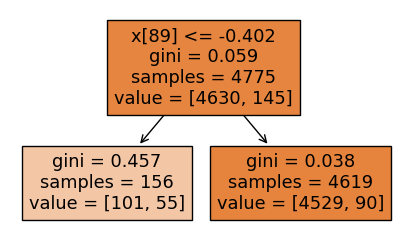

In [8]:
fig = plt.figure(figsize= (5, 3))
plot_tree(tree1, filled = True)
plt.show()

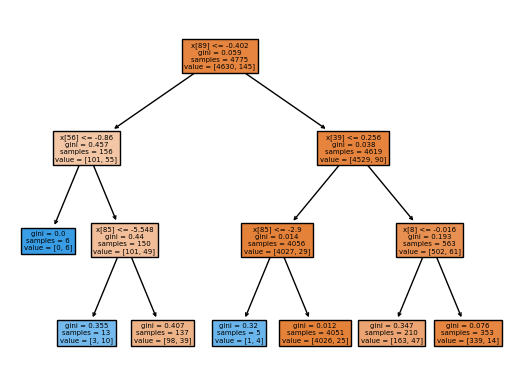

In [9]:
plot_tree(tree2, filled = True)
plt.show()

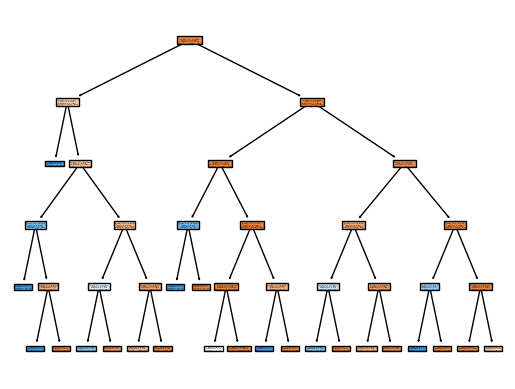

In [10]:
plot_tree(tree3, filled = True)
plt.show()

In [11]:
predicted1 = tree1.predict(x_val)
accuracy1 = accuracy_score(predicted1, y_val)
print(f'Accuracy tree depth 1 val_data: {accuracy1}')

predicted2 = tree2.predict(x_val)
accuracy2 = accuracy_score(predicted2, y_val)
print(f'Accuracy tree depth 2 val_data: {accuracy2}')

predicted3 = tree3.predict(x_val)
accuracy3 = accuracy_score(predicted3, y_val)
print(f'Accuracy tree depth 3 val_data: {accuracy3}')

print()
predicted1 = tree1.predict(x_test)
accuracy1 = accuracy_score(predicted1, y_test)
print(f'Accuracy tree depth 1: {accuracy1}')

predicted2 = tree2.predict(x_test)
accuracy2 = accuracy_score(predicted2, y_test)
print(f'Accuracy tree depth 2: {accuracy2}')

predicted3 = tree3.predict(x_test)
accuracy3 = accuracy_score(predicted3, y_test)
print(f'Accuracy tree depth 3: {accuracy3}')


Accuracy tree depth 1 val_data: 0.9686581782566112
Accuracy tree depth 2 val_data: 0.9676787463271302
Accuracy tree depth 3 val_data: 0.9725759059745348

Accuracy tree depth 1: 0.9579667644183774
Accuracy tree depth 2: 0.9618768328445748
Accuracy tree depth 3: 0.9579667644183774


In [12]:
np.random.seed(42)  
noise = np.random.uniform(-0.1, 0.1, x_train.shape)
x_train_noisy = x_train + noise

tree1_noisy = DecisionTreeClassifier(max_depth = 1, random_state = 13)
tree1_noisy.fit(x_train_noisy, y_train)

tree2_noisy = DecisionTreeClassifier(max_depth = 3, random_state = 13)
tree2_noisy.fit(x_train_noisy, y_train)

tree3_noisy = DecisionTreeClassifier(max_depth = 5, random_state = 13)
tree3_noisy.fit(x_train_noisy, y_train)

DecisionTreeClassifier(max_depth=5, random_state=13)

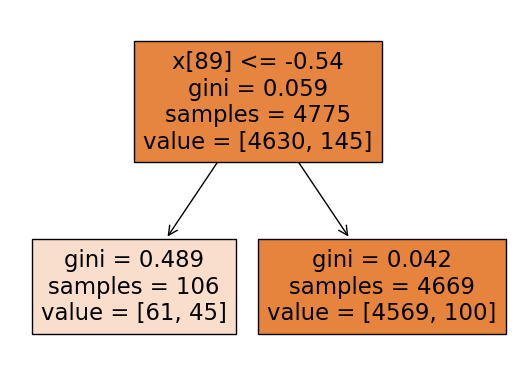

In [13]:
plot_tree(tree1_noisy, filled = True)
plt.show()

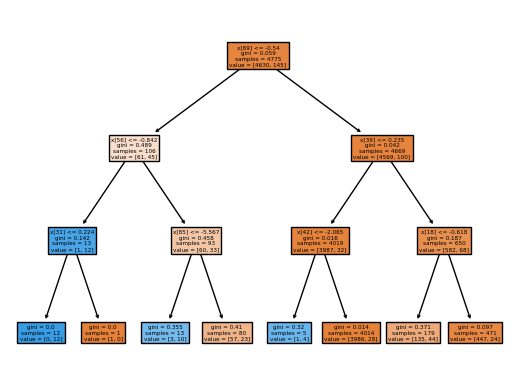

In [14]:
plot_tree(tree2_noisy, filled = True)
plt.show()

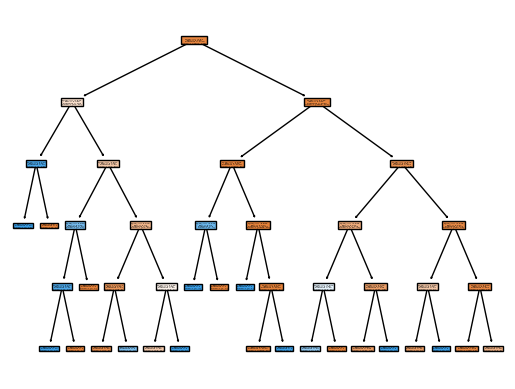

In [15]:
plot_tree(tree3_noisy, filled = True)
plt.show()

In [16]:
predicted1 = tree1_noisy.predict(x_val)
accuracy1 = accuracy_score(predicted1, y_val)
print(f'Accuracy tree depth 1 val_data: {accuracy1}')

predicted2 = tree2_noisy.predict(x_val)
accuracy2 = accuracy_score(predicted2, y_val)
print(f'Accuracy tree depth 2 val_data: {accuracy2}')

predicted3 = tree3_noisy.predict(x_val)
accuracy3 = accuracy_score(predicted3, y_val)
print(f'Accuracy tree depth 3 val_data: {accuracy3}')

print()
predicted1 = tree1_noisy.predict(x_test)
accuracy1 = accuracy_score(predicted1, y_test)
print(f'Accuracy tree depth 1 test_data: {accuracy1}')

predicted2 = tree2_noisy.predict(x_test)
accuracy2 = accuracy_score(predicted2, y_test)
print(f'Accuracy tree depth 2 test_data: {accuracy2}')

predicted3 = tree3_noisy.predict(x_test)
accuracy3 = accuracy_score(predicted3, y_test)
print(f'Accuracy tree depth 3 test_data: {accuracy3}')

Accuracy tree depth 1 val_data: 0.9686581782566112
Accuracy tree depth 2 val_data: 0.9666993143976493
Accuracy tree depth 3 val_data: 0.9647404505386875

Accuracy tree depth 1 test_data: 0.9579667644183774
Accuracy tree depth 2 test_data: 0.9618768328445748
Accuracy tree depth 3 test_data: 0.9579667644183774


In [17]:
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train)

pca_noisy = PCA(n_components=2)
x_train_noisy_pca = pca_noisy.fit_transform(x_train_noisy)

Text(0.5, 1.0, 'Original Data PCA Components')

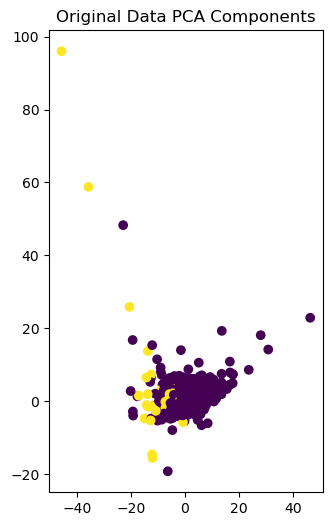

In [18]:
label = LabelEncoder()
y_label = label.fit_transform(y_train)
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=y_label)
plt.title('Original Data PCA Components')

Text(0.5, 1.0, 'Noisy Data PCA Components')

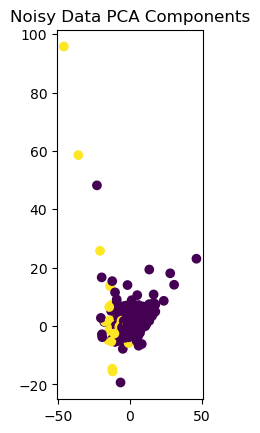

In [19]:
plt.subplot(1, 3, 1)
plt.scatter(x_train_noisy_pca[:, 0], x_train_noisy_pca[:, 1], c=y_label)
plt.title('Noisy Data PCA Components')

In [20]:
pca_reconstruction = PCA(n_components=0.95)
x_train_noisy_pca_reduced = pca_reconstruction.fit_transform(x_train_noisy)
x_train_noisy_pca_reconstructed = pca_reconstruction.inverse_transform(x_train_noisy_pca_reduced)

Text(0.5, 1.0, 'Denoised Data using PCA')

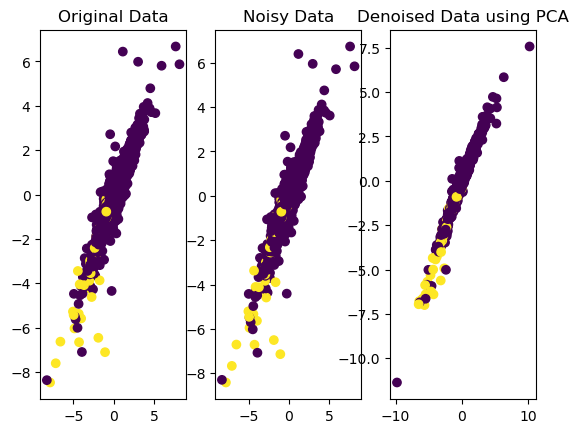

In [21]:
plt.subplot(1, 3, 1)
plt.scatter(x_train.values[:, 0], x_train.values[:, 1], c=y_label)
plt.title('Original Data')

plt.subplot(1, 3, 2)
plt.scatter(x_train_noisy.values[:, 0], x_train_noisy.values[:, 1], c=y_label)
plt.title('Noisy Data')

plt.subplot(1, 3, 3)
plt.scatter(x_train_noisy_pca_reconstructed[:, 0], x_train_noisy_pca_reconstructed[:, 1], c=y_label)
plt.title('Denoised Data using PCA')


/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


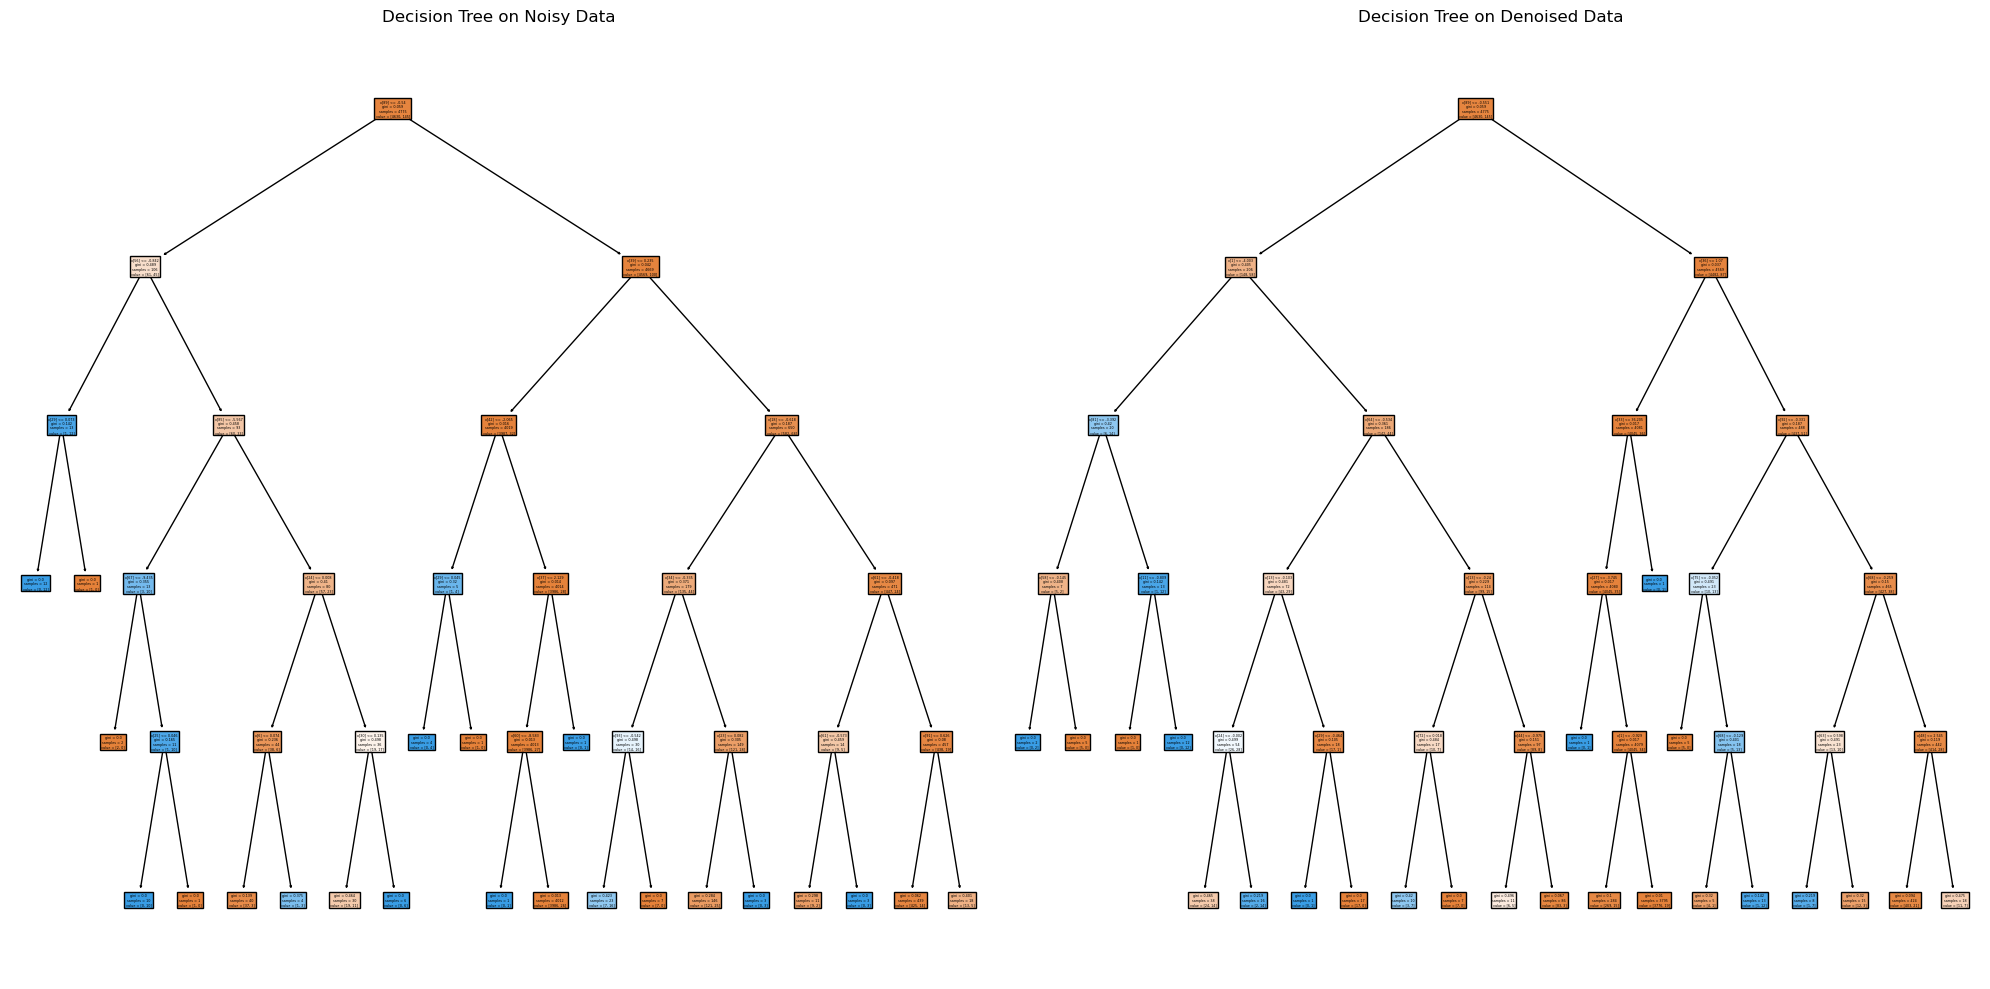

(0.9637610186092067,
 0.9579667644183774,
 0.9666993143976493,
 0.9560117302052786)

In [22]:
tree_noisy = DecisionTreeClassifier(max_depth= 5, random_state=42).fit(x_train_noisy, y_train)
tree_denoised = DecisionTreeClassifier(max_depth= 5, random_state=42).fit(x_train_noisy_pca_reconstructed, y_train)

val_accuracy_noisy = accuracy_score(y_val, tree_noisy.predict(x_val))
val_accuracy_denoised = accuracy_score(y_val, tree_denoised.predict(x_val))

test_accuracy_noisy = accuracy_score(y_test, tree_noisy.predict(x_test))
test_accuracy_denoised = accuracy_score(y_test, tree_denoised.predict(x_test))

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
plot_tree(tree_noisy, filled=True, ax=axes[0])
axes[0].set_title('Decision Tree on Noisy Data')
plot_tree(tree_denoised, filled=True, ax=axes[1])
axes[1].set_title('Decision Tree on Denoised Data')

plt.tight_layout()
plt.show()

(val_accuracy_noisy, test_accuracy_noisy, val_accuracy_denoised, test_accuracy_denoised)